# Import libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from imblearn import over_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, RepeatedStratifiedKFold
from scipy.stats import uniform
import pickle
#import xgboost as xgb

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)
import pandas as pd


numpy version :  1.20.3
pandas version :  1.3.4
seaborn version :  0.11.2


# load dataset

In [9]:
test=pd.read_csv('test_2.csv')

In [10]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [11]:
data=pd.read_csv('train_.csv')

In [12]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [13]:
data['is_promoted'].value_counts()
#as we see ,we have 50140 not and 4668 yes,so our data is imbalanced

0    50140
1     4668
Name: is_promoted, dtype: int64

In [14]:
print('Our data is {} rows and {} columns'.format(data.shape[0],data.shape[1]))

Our data is 54808 rows and 14 columns


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [16]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [17]:
data.education.fillna(data.education.mode()[0],inplace=True)

In [18]:
data.previous_year_rating.fillna(data.previous_year_rating.mean(),inplace=True)

In [19]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Explore data analysis

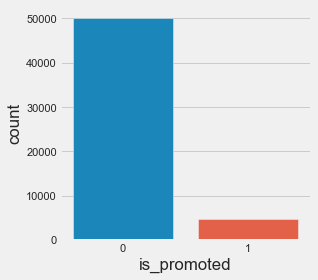

In [20]:
plt.figure(figsize=(4,4))
sns.countplot(data['is_promoted'])
plt.show()

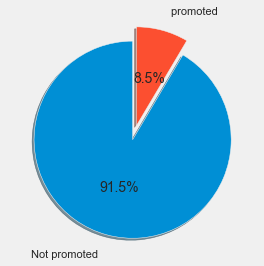

In [21]:
plt.figure(figsize=(4,4))
plt.pie(data['is_promoted'].value_counts(),labels=(' Not promoted ', ' promoted'),
        explode = [0.09,0.06],autopct ='%1.1f%%'
        ,shadow = True, startangle = 90,
        labeldistance = 1.2, pctdistance =0.5)
plt.axis('equal')
plt.show()

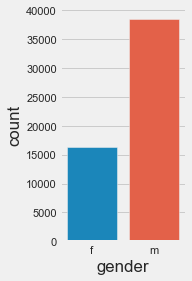

In [22]:
plt.figure(figsize=(2,4))
sns.countplot(data['gender'])
plt.show()

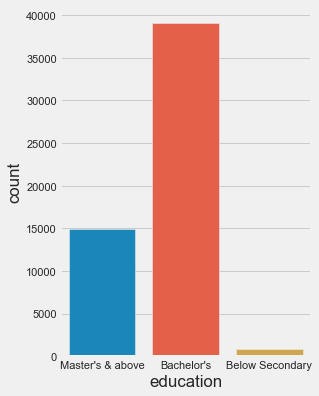

In [23]:

plt.figure(figsize=(4,6))
sns.countplot(data['education'])
plt.show()

In [24]:
data.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

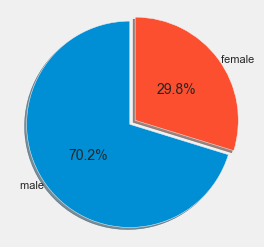

In [25]:
plt.figure(figsize=(4,4))
plt.pie(data['gender'].value_counts(),labels=(' male ', ' female'),
        explode = [0.005,0.06],autopct ='%1.1f%%'
        ,shadow = True, startangle = 90,
        labeldistance = 1.0, pctdistance =0.5)
plt.axis('equal')
plt.show()

<AxesSubplot:>

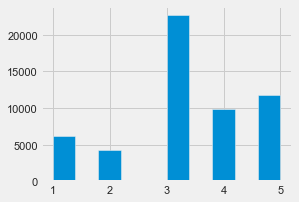

In [26]:
plt.figure(figsize=(4,3))
data.previous_year_rating.hist()

<AxesSubplot:xlabel='education', ylabel='count'>

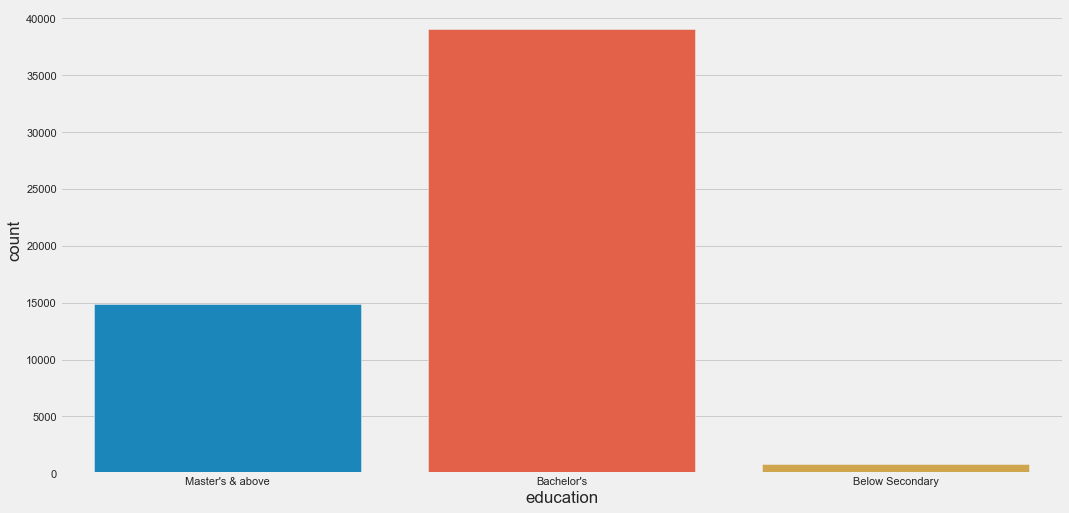

In [27]:
sns.countplot(data.education)

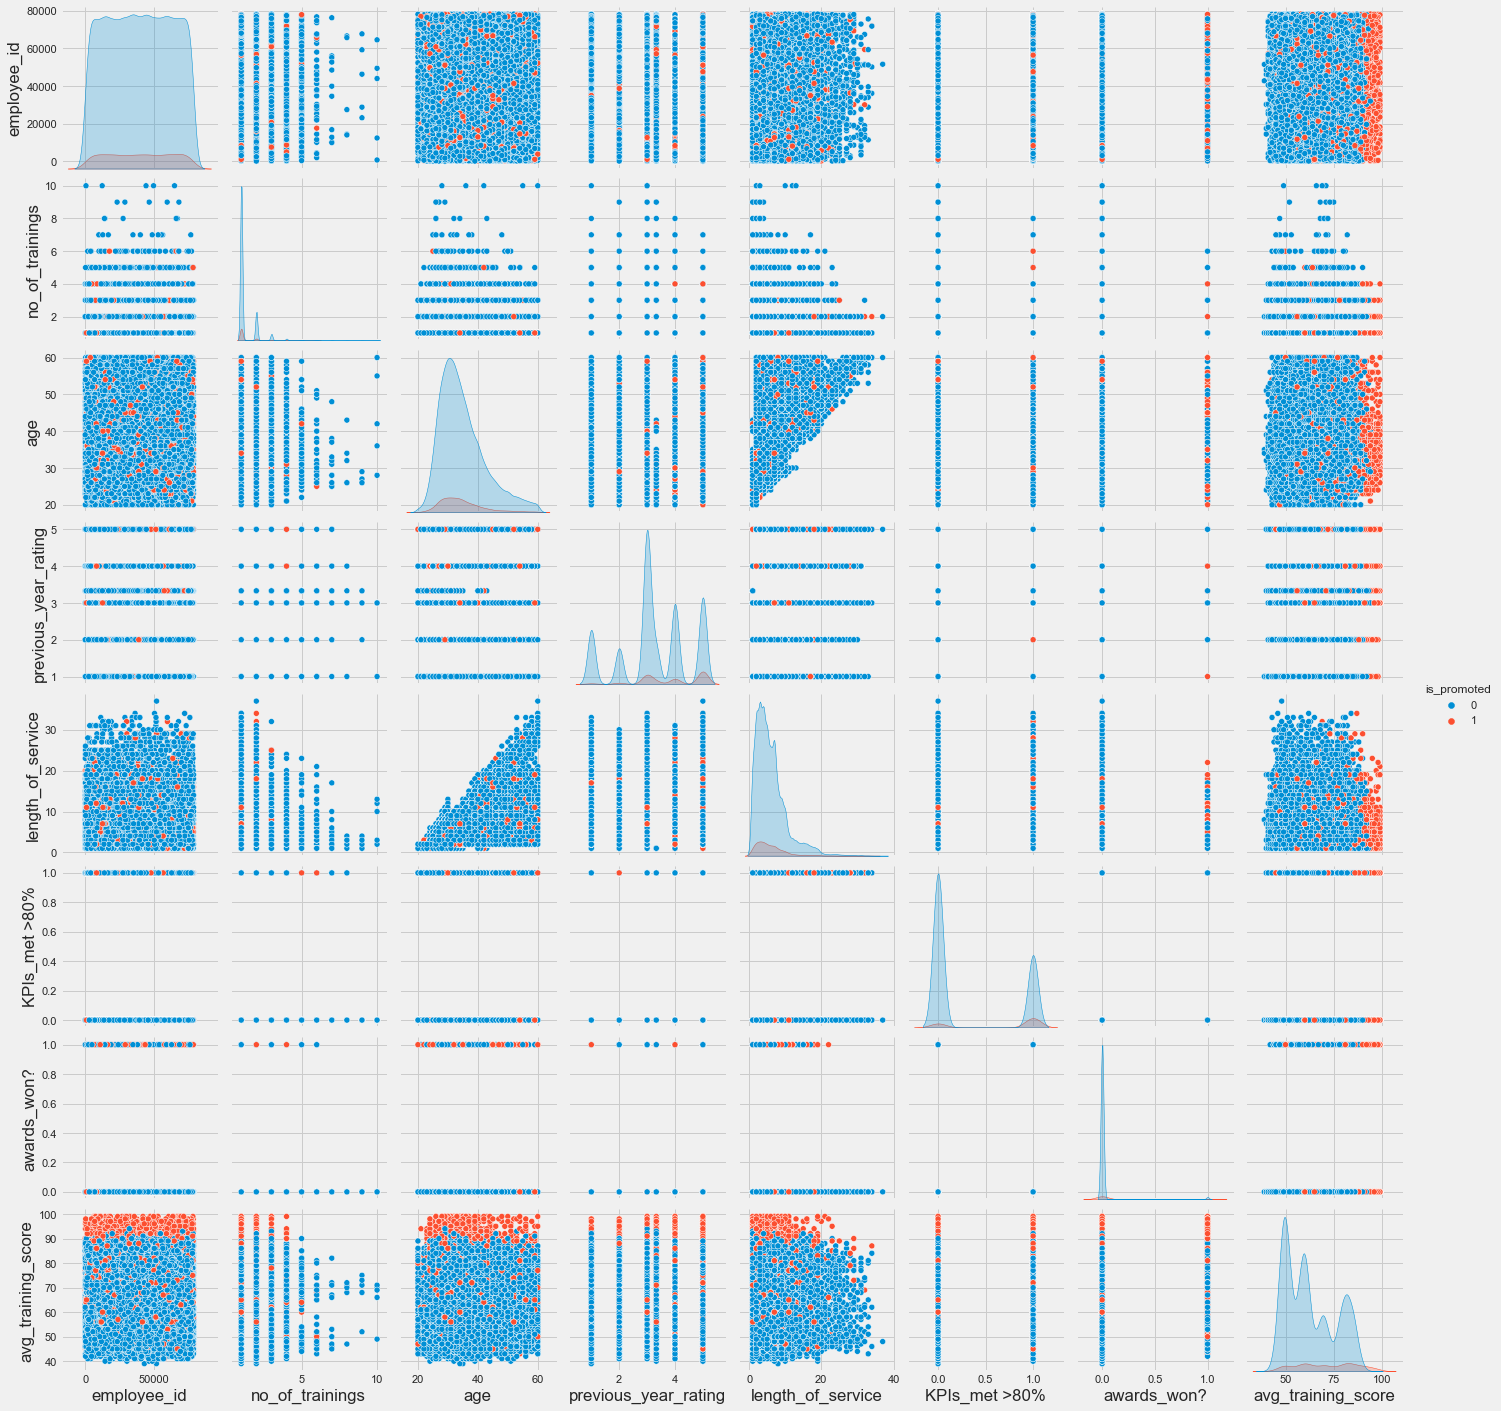

In [29]:

sns.pairplot(data,diag_kind='kde',hue='is_promoted')

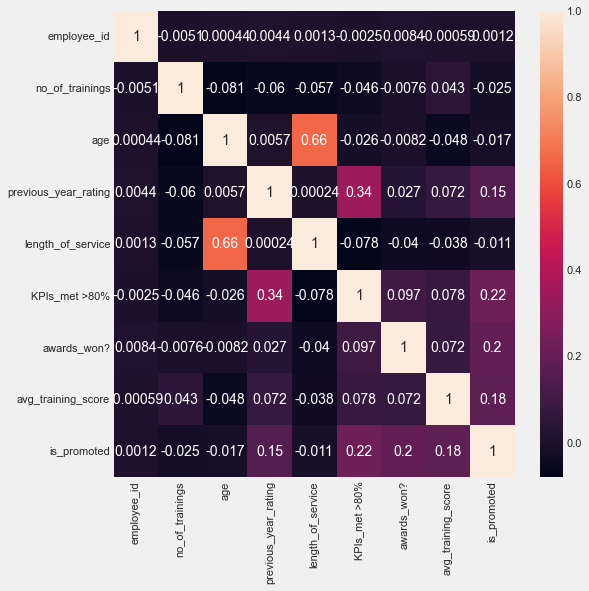

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)
plt.show()


# the data is imbalance

In [31]:
data.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

# treatment the imbalanced data

In [35]:

class_count_0, class_count_1 = data['is_promoted'].value_counts()
class_0 = data[data['is_promoted'] == 0]
class_1 = data[data['is_promoted'] == 1]# print the shape of the class
print('is_promoted = 0:', class_0.shape)
print('is_promoted = 1:', class_1.shape)

is_promoted = 0: (50140, 14)
is_promoted = 1: (4668, 14)


In [37]:
#treatment the imbalanced data
class_0_under = class_0.sample(class_count_1)

new_data = pd.concat([class_0_under, class_1], axis=0)

#print("total class of 1 and0:",test_under['is_promoted'].value_counts())# plot the count after under-sampeling
#new_data['is_promoted'].value_counts().plot(kind='bar', title='count (target)')

In [38]:
new_data.shape

(9336, 14)

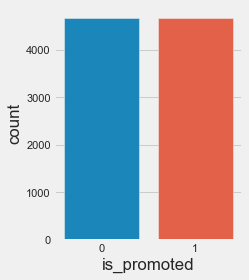

In [39]:
plt.figure(figsize=(3,4))
sns.countplot(new_data['is_promoted'])
plt.show()

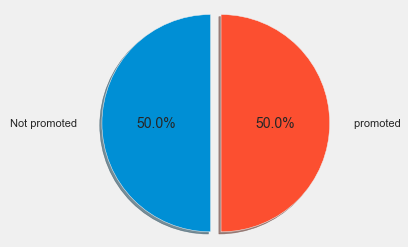

In [40]:
plt.figure(figsize=(4,4))
plt.pie(new_data['is_promoted'].value_counts(),labels=(' Not promoted ', ' promoted'),
        explode = [0.09,0.006],autopct ='%1.1f%%'
        ,shadow = True, startangle = 90,
        labeldistance = 1.2, pctdistance =0.5)
plt.axis('equal')
plt.show()

# Data visualization

In [41]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [42]:
import sweetviz 

In [43]:
report = sweetviz.analyze(new_data)

                                             |      | [  0%]   00:00 -> (? left)

In [44]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Data cleaning

In [53]:
#dealing with missing values
data_clean = new_data.copy()
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 39941 to 54796
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           9336 non-null   int64  
 1   department            9336 non-null   object 
 2   region                9336 non-null   object 
 3   education             9336 non-null   object 
 4   gender                9336 non-null   object 
 5   recruitment_channel   9336 non-null   object 
 6   no_of_trainings       9336 non-null   int64  
 7   age                   9336 non-null   int64  
 8   previous_year_rating  9336 non-null   float64
 9   length_of_service     9336 non-null   int64  
 10  KPIs_met >80%         9336 non-null   int64  
 11  awards_won?           9336 non-null   int64  
 12  avg_training_score    9336 non-null   int64  
 13  is_promoted           9336 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.3+ MB


In [54]:
new_data['education'].value_counts()

Bachelor's          6460
Master's & above    2731
Below Secondary      145
Name: education, dtype: int64

In [55]:
data_clean['education'] = data_clean['education'].fillna(data_clean['education'].mode()[0])

In [56]:
data_clean['education'].value_counts()

Bachelor's          6460
Master's & above    2731
Below Secondary      145
Name: education, dtype: int64

In [57]:
new_data['previous_year_rating'].value_counts()

3.000000    2976
5.000000    2820
4.000000    1625
1.000000     676
3.329256     675
2.000000     564
Name: previous_year_rating, dtype: int64

In [58]:
data_clean['previous_year_rating'].fillna(data_clean['previous_year_rating'].median(), inplace=True)

In [59]:
data_clean['previous_year_rating'].value_counts()

3.000000    2976
5.000000    2820
4.000000    1625
1.000000     676
3.329256     675
2.000000     564
Name: previous_year_rating, dtype: int64

In [60]:
data_clean.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [61]:
data_cat = data_clean.select_dtypes(include=['object'])
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['fitur', 'unik nilai']
data_cat_unique = data_cat_unique.sort_values('unik nilai', ascending=False)
data_cat_unique

,fitur,unik nilai
1,region,34
0,department,9
2,education,3
4,recruitment_channel,3
3,gender,2


In [62]:
data_clean['potential_region'] = np.where(data_clean['region'].isin(['region_4','region_17','region_25','region_28','region_23',
                                                   'region_3','region_7']),
                              1, 0)
data_clean.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,potential_region
39941,57816,Procurement,region_2,Bachelor's,f,other,1,57,3.0,15,0,0,69,0,0
5201,53602,Procurement,region_13,Bachelor's,f,sourcing,1,39,3.0,7,0,0,71,0,0
44712,64174,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,29,4.0,5,0,0,51,0,0
45703,14744,Analytics,region_2,Bachelor's,m,other,1,27,3.0,3,1,0,84,0,0
19443,24270,Sales & Marketing,region_31,Bachelor's,m,sourcing,1,50,3.0,18,0,0,52,0,0


In [63]:
data_cat = data_clean.select_dtypes(include=['object'])
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['fitur', 'unik nilai']
data_cat_unique = data_cat_unique.sort_values('unik nilai', ascending=False)
data_cat_unique

,fitur,unik nilai
1,region,34
0,department,9
2,education,3
4,recruitment_channel,3
3,gender,2


# dumy data

In [64]:
potential_reg_probs = data_clean.groupby(['potential_region', 'is_promoted']).agg({
    'department': ['count']
}).reset_index()

potential_reg_probs.columns = ['potential_region', 'is_promoted','employees']

potential_reg_probs = pd.pivot_table(potential_reg_probs,
                             index = 'potential_region',
                             columns = 'is_promoted',
                             values = 'employees').reset_index()

potential_reg_probs.columns = ['potential_region','not_promoted','promoted']
potential_reg_probs['total_employees'] = potential_reg_probs['not_promoted'] + potential_reg_probs['promoted']
potential_reg_probs['promotion_probs'] = (potential_reg_probs['promoted']/(potential_reg_probs['not_promoted']+potential_reg_probs['promoted']))*100
potential_reg_probs = potential_reg_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
potential_reg_probs['potential_region'] = np.where(potential_reg_probs['potential_region'] == 1, 'YES', 'NO')
potential_reg_probs

,potential_region,not_promoted,promoted,total_employees,promotion_probs
0,YES,902,1302,2204,59.074410
1,NO,3766,3366,7132,47.195738


In [65]:
data_clean['High_Avg_Tscore'] = np.where(data_clean['avg_training_score']>=80, 1, 0)
data_clean.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,potential_region,High_Avg_Tscore
39941,57816,Procurement,region_2,Bachelor's,f,other,1,57,3.0,15,0,0,69,0,0,0
5201,53602,Procurement,region_13,Bachelor's,f,sourcing,1,39,3.0,7,0,0,71,0,0,0
44712,64174,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,29,4.0,5,0,0,51,0,0,0
45703,14744,Analytics,region_2,Bachelor's,m,other,1,27,3.0,3,1,0,84,0,0,1
19443,24270,Sales & Marketing,region_31,Bachelor's,m,sourcing,1,50,3.0,18,0,0,52,0,0,0


In [66]:
data_clean['male'] = np.where(data_clean['gender']=='m', 1, 0)
data_clean.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,potential_region,High_Avg_Tscore,male
39941,57816,Procurement,region_2,Bachelor's,f,other,1,57,3.0,15,0,0,69,0,0,0,0
5201,53602,Procurement,region_13,Bachelor's,f,sourcing,1,39,3.0,7,0,0,71,0,0,0,0
44712,64174,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,29,4.0,5,0,0,51,0,0,0,1
45703,14744,Analytics,region_2,Bachelor's,m,other,1,27,3.0,3,1,0,84,0,0,1,1
19443,24270,Sales & Marketing,region_31,Bachelor's,m,sourcing,1,50,3.0,18,0,0,52,0,0,0,1


In [67]:
dummies_dept = pd.get_dummies(data_clean['department'], prefix='Dept')
data_clean = pd.concat([data_clean, dummies_dept], axis=1)

In [68]:

dummies_edu = pd.get_dummies(data_clean['education'])
data_clean = pd.concat([data_clean, dummies_edu], axis=1)

In [69]:
dummies_rc = pd.get_dummies(data_clean['recruitment_channel'])
data_clean = pd.concat([data_clean, dummies_rc], axis=1)

In [70]:
dummies_dept = pd.get_dummies(data_clean['department'], prefix='Dept')
data_clean = pd.concat([data_clean, dummies_dept], axis=1)

In [71]:
dummies_edu = pd.get_dummies(data_clean['education'])
data_clean = pd.concat([data_clean, dummies_edu], axis=1)

In [72]:
dummies_rc = pd.get_dummies(data_clean['recruitment_channel'])
data_clean = pd.concat([data_clean, dummies_rc], axis=1)

In [73]:
data_clean['potential_region'] = np.where(data_clean['region'].isin(['region_4','region_17','region_25','region_28','region_23',
                                                   'region_3','region_7']),
                              1, 0)
data_clean.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,Dept_Procurement,Dept_R&D,Dept_Sales & Marketing,Dept_Technology,Bachelor's,Below Secondary,Master's & above,other,referred,sourcing
39941,57816,Procurement,region_2,Bachelor's,f,other,1,57,3.0,15,...,1,0,0,0,1,0,0,1,0,0
5201,53602,Procurement,region_13,Bachelor's,f,sourcing,1,39,3.0,7,...,1,0,0,0,1,0,0,0,0,1
44712,64174,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,29,4.0,5,...,0,0,1,0,1,0,0,0,0,1
45703,14744,Analytics,region_2,Bachelor's,m,other,1,27,3.0,3,...,0,0,0,0,1,0,0,1,0,0
19443,24270,Sales & Marketing,region_31,Bachelor's,m,sourcing,1,50,3.0,18,...,0,0,1,0,1,0,0,0,0,1


In [74]:
x_norm = data_clean[['no_of_trainings','age','previous_year_rating','length_of_service','Dept_Procurement','Dept_R&D',
                'Dept_Sales & Marketing','Dept_Technology','Bachelor\'s','Below Secondary',
                 'Master\'s & above','other','referred','sourcing']]
y_norm = new_data['is_promoted']

In [75]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_norm,
                                                y_norm,
                                                test_size=0.2, random_state=42) 

# Modeling

In [76]:
#Model No. 1 Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (random_state=50)
rf_model = rf.fit(xtrain, ytrain)

print('Rarf_modelndom forest Train Score is : ' , rf_model.score(xtrain, ytrain))
print('Random forest Test Score is : ' , rf_model.score(xtest, ytest))

Rarf_modelndom forest Train Score is :  0.8905998928762721
Random forest Test Score is :  0.5792291220556746


In [77]:
y_pred = rf_model.predict(xtest)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [78]:
from sklearn.metrics import classification_report
# evaluation of logistic regression
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       897
           1       0.60      0.58      0.59       971

    accuracy                           0.58      1868
   macro avg       0.58      0.58      0.58      1868
weighted avg       0.58      0.58      0.58      1868



Confusion Matrix is : 
 [[521 410]
 [376 561]]


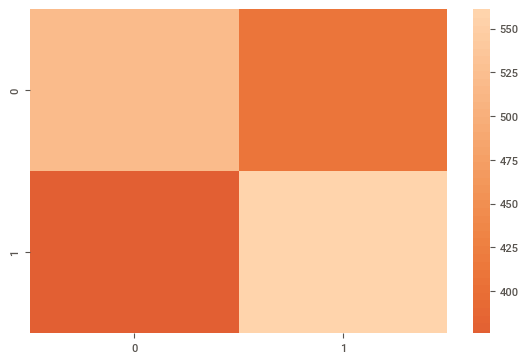

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
plt.figure(figsize=(6,4))
CM = confusion_matrix(ytest, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True)
plt.show()

In [80]:
#Model No. 2 Suppoer Vector Machine
from sklearn.svm import SVC
SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(xtrain, ytrain)
print('SVCModel Train Score is : ' , SVCModel.score(xtrain, ytrain))
print('SVCModel Test Score is : ' , SVCModel.score(xtest, ytest))
y_pred = SVCModel.predict(xtest)

SVCModel Train Score is :  0.5301285484734869
SVCModel Test Score is :  0.5294432548179872


In [81]:
y_pred = rf_model.predict(xtest)
y_pred[:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [82]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       897
           1       0.60      0.58      0.59       971

    accuracy                           0.58      1868
   macro avg       0.58      0.58      0.58      1868
weighted avg       0.58      0.58      0.58      1868



Confusion Matrix is : 
 [[521 410]
 [376 561]]


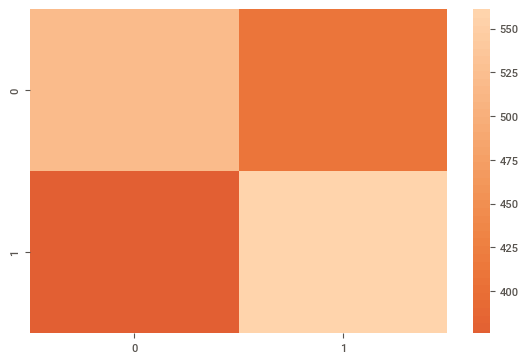

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
plt.figure(figsize=(6,4))
CM = confusion_matrix(ytest, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True)
plt.show()

In [84]:
#Model No.3 Neural Network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)
mlp.fit(xtrain, ytrain)
print('DecisionTreeRegressor Train Score is : ' , mlp.score(xtrain, ytrain))
print('DecisionTreeRegressor Test Score is : ' , mlp.score(xtest, ytest))
y_pred = mlp.predict(xtest)

DecisionTreeRegressor Train Score is :  0.6653722549544724
DecisionTreeRegressor Test Score is :  0.6011777301927195


Confusion Matrix is : 
 [[518 413]
 [332 605]]


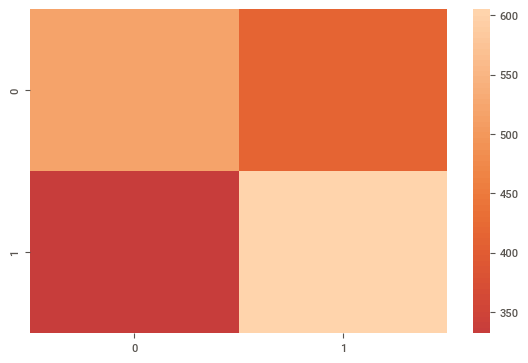

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
plt.figure(figsize=(6,4))
CM = confusion_matrix(ytest, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True)
plt.show()

#  Model evaluation 

In [86]:
accuracies = {'Model': [ 'SVRModel', 'Random Forest',  'MLP'],
     'accuracy' : [ SVCModel.score(xtest, ytest), rf_model.score(xtest, ytest),  mlp.score(xtest, ytest)]}

result = pd.DataFrame(data = accuracies)
result

,Model,accuracy
0,SVRModel,0.529443
1,Random Forest,0.579229
2,MLP,0.601178
